In [880]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import *
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.tree import *
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

In [881]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\Dockship-AI-challenges\Exam marks prediction AI challenge\train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\Dockship-AI-challenges\Exam marks prediction AI challenge\test.csv')
sample = pd.read_csv(r'C:\Users\Rahul\Desktop\Dockship-AI-challenges\Exam marks prediction AI challenge\sample_submissions.csv')

In [882]:
train.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,0,male,group C,some college,standard,none,61,62,61
1,1,female,group C,associate's degree,standard,none,62,53,53
2,2,female,group C,some college,free/reduced,completed,75,70,67
3,3,male,group C,some high school,free/reduced,none,76,65,79
4,4,male,group A,high school,free/reduced,none,58,44,53


In [883]:
test.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,female,group C,some college,standard,none,67,72
1,1,male,group E,some college,standard,none,60,59
2,2,female,group C,bachelor's degree,standard,none,93,95
3,3,male,group D,associate's degree,standard,none,48,46
4,4,female,group B,associate's degree,standard,none,76,80


In [884]:
sample.head()

,idx,math score
0,0,70
1,1,70
2,2,70
3,3,70
4,4,70


In [885]:
train.rename(columns={'Unnamed: 0' : 'idx'}, inplace=True)
test.rename(columns={'Unnamed: 0' : 'idx'}, inplace=True)

In [886]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
idx                            700 non-null int64
gender                         700 non-null object
ethnicity                      700 non-null object
parental level of education    700 non-null object
lunch                          700 non-null object
test preparation course        700 non-null object
reading score                  700 non-null int64
writing score                  700 non-null int64
math score                     700 non-null int64
dtypes: int64(4), object(5)
memory usage: 49.3+ KB


In [887]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
idx                            300 non-null int64
gender                         300 non-null object
ethnicity                      300 non-null object
parental level of education    300 non-null object
lunch                          300 non-null object
test preparation course        300 non-null object
reading score                  300 non-null int64
writing score                  300 non-null int64
dtypes: int64(3), object(5)
memory usage: 18.8+ KB


In [888]:
train.describe()

,idx,reading score,writing score,math score
count,700.00000,700.000000,700.000000,700.000000
mean,349.50000,69.751429,68.497143,66.442857
std,202.21688,14.600877,15.224265,15.249227
min,0.00000,23.000000,15.000000,8.000000
25%,174.75000,60.000000,58.000000,57.000000
50%,349.50000,70.000000,70.000000,66.500000
75%,524.25000,80.000000,79.000000,77.000000
max,699.00000,100.000000,100.000000,100.000000


In [889]:
test.describe()

,idx,reading score,writing score
count,300.000000,300.000000,300.000000
mean,149.500000,67.810000,67.020000
std,86.746758,14.532189,15.103421
min,0.000000,17.000000,10.000000
25%,74.750000,58.000000,57.000000
50%,149.500000,69.000000,68.000000
75%,224.250000,78.000000,77.250000
max,299.000000,100.000000,100.000000


### Target analysis

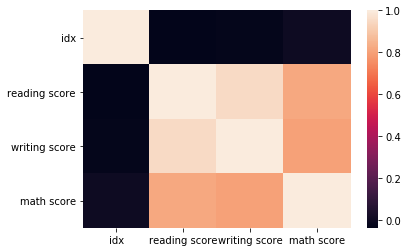

In [890]:
sns.heatmap(train.corr())

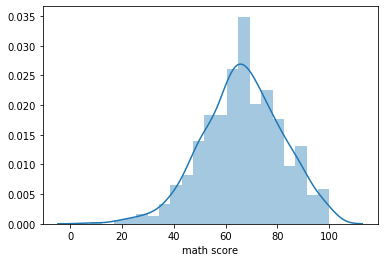

In [891]:
sns.distplot(train['math score'])

In [892]:
train['math score'].head()

0    61
1    53
2    67
3    79
4    53
Name: math score, dtype: int64

### Feature analysis

#### Gender

In [893]:
train.gender.value_counts()

female    367
male      333
Name: gender, dtype: int64

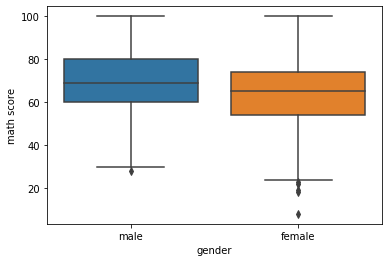

In [894]:
sns.boxplot(train.gender, train['math score'])

#### Ethnicity

In [895]:
train.ethnicity.value_counts()

group C    219
group D    184
group B    141
group E     98
group A     58
Name: ethnicity, dtype: int64

In [896]:
test.ethnicity.value_counts()

group C    100
group D     78
group B     49
group E     42
group A     31
Name: ethnicity, dtype: int64

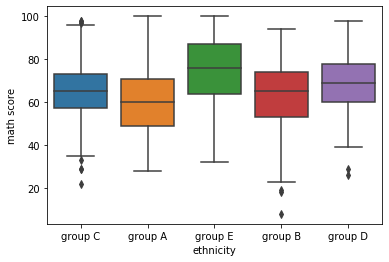

In [897]:
sns.boxplot(train.ethnicity,train['math score'])

In [898]:
#train.drop(index=train[train['math score']<20].index,inplace=True)
#train.reset_index(drop=True,inplace=True)

#### parental level of education

In [899]:
train['parental level of education'].value_counts()

some college          175
associate's degree    138
high school           134
some high school      129
bachelor's degree      81
master's degree        43
Name: parental level of education, dtype: int64

In [900]:
#train['parental level of education'].replace({'some college':'college','some high school':'high school'},inplace=True)
#test['parental level of education'].replace({'some college':'college','some high school':'high school'},inplace=True)

In [901]:
test['parental level of education'].value_counts()

associate's degree    84
high school           62
some college          51
some high school      50
bachelor's degree     37
master's degree       16
Name: parental level of education, dtype: int64

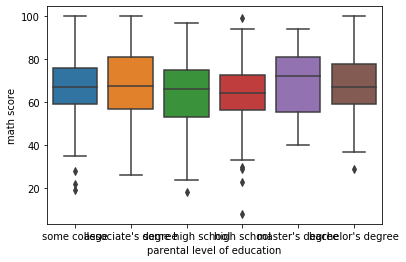

In [902]:
sns.boxplot(train['parental level of education'], train['math score'])

#### lunch

In [903]:
train['lunch'].value_counts()

standard        454
free/reduced    246
Name: lunch, dtype: int64

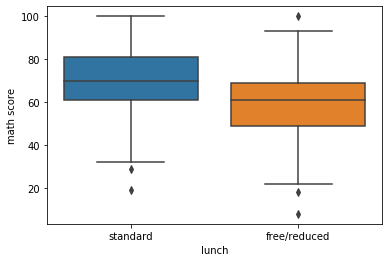

In [904]:
sns.boxplot(train['lunch'],train['math score'])

#### test preparation course

In [905]:
train['test preparation course'].value_counts()

none         456
completed    244
Name: test preparation course, dtype: int64

#### reading score

In [906]:
train[train['writing score']<=20]

,idx,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
140,140,male,group B,high school,free/reduced,none,24,15,30
623,623,male,group A,some college,free/reduced,none,23,19,28


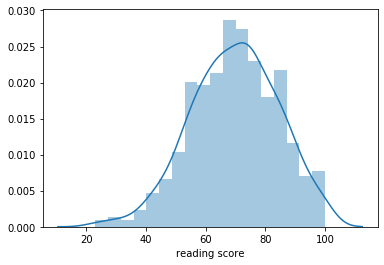

In [907]:
sns.distplot(train['reading score'])

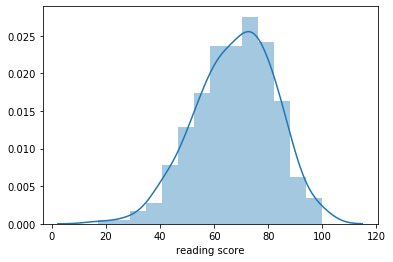

In [908]:
sns.distplot(test['reading score'])

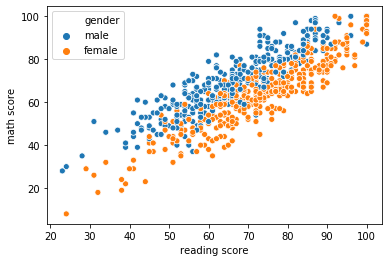

In [909]:
sns.scatterplot(train['reading score'],train['math score'], hue=train['gender'])

#### writing score

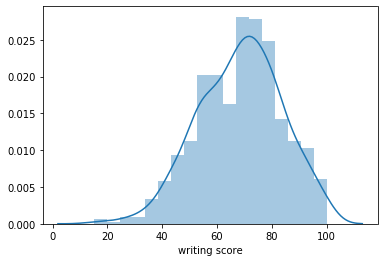

In [910]:
sns.distplot(train['writing score'])

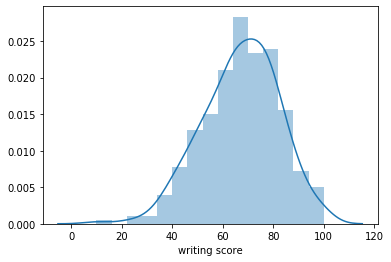

In [911]:
sns.distplot(test['writing score'])

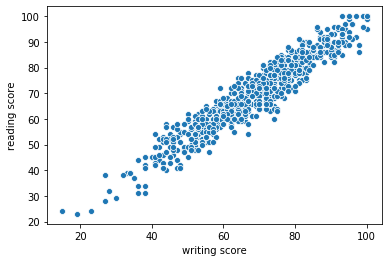

In [912]:
sns.scatterplot(train['writing score'], train['reading score'])

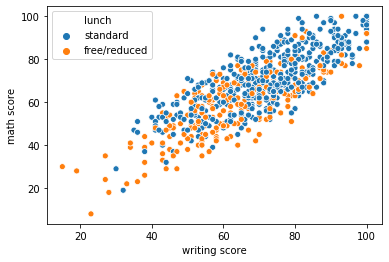

In [913]:
sns.scatterplot(train['writing score'], train['math score'],hue = train['lunch'])

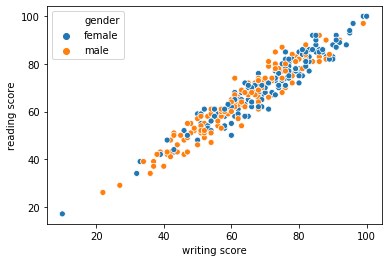

In [914]:
sns.scatterplot(test['writing score'], test['reading score'],hue=test['gender'])

#### engineering features

In [915]:
df = pd.concat([train,test],axis=0)
df.reset_index(drop=True,inplace=True)
df['idx'] = np.arange(0,df.shape[0],1)

In [916]:
df.head()

,ethnicity,gender,idx,lunch,math score,parental level of education,reading score,test preparation course,writing score
0,group C,male,0,standard,61.0,some college,61,none,62
1,group C,female,1,standard,53.0,associate's degree,62,none,53
2,group C,female,2,free/reduced,67.0,some college,75,completed,70
3,group C,male,3,free/reduced,79.0,some high school,76,none,65
4,group A,male,4,free/reduced,53.0,high school,58,none,44


In [917]:
#df['Max_diff_ws'] = 100 - df['writing score']
#df['Max_diff_rs'] = 100 - df['reading score']

df['total score'] = df['reading score'] + df['writing score']

df['All_rs_sum'] = df.groupby(['parental level of education','test preparation course'])['reading score'].transform('mean')
df['All_ws_sum'] = df.groupby(['parental level of education','test preparation course'])['writing score'].transform('mean')
df['All_ts_sum'] = df.groupby(['parental level of education','test preparation course'])['total score'].transform('mean')
df['All_idx_uniq'] = df.groupby(['parental level of education','test preparation course'])['idx'].transform('nunique')



#df['All_ws_sum'] = df.groupby(['gender', 'lunch','test preparation course'])['writing score'].transform('sum')
#df['All_rs_max'] = df.groupby(['gender', 'lunch','test preparation course'])['reading score'].transform('max')
#df['All_ws_max'] = df.groupby(['gender', 'lunch','test preparation course'])['writing score'].transform('max')
#df['All_rs_min'] = df.groupby(['gender', 'lunch','test preparation course'])['reading score'].transform('min')
#df['All_ws_min'] = df.groupby(['gender', 'lunch','test preparation course'])['writing score'].transform('min')
df['All_rs_mean'] = df.groupby(['gender', 'lunch','test preparation course'])['reading score'].transform('mean')
df['All_ws_mean'] = df.groupby(['gender', 'lunch','test preparation course'])['writing score'].transform('mean')
#df['All_rs_nuniq'] = df.groupby(['gender', 'lunch','test preparation course'])['idx'].transform('nunique')
#df['All_ws_nuniq'] = df.groupby(['gender', 'lunch','test preparation course'])['writing score'].transform('nunique')


#df['total score 2'] = ((df['reading score'])**2) - ((df['writing score'])**2)

#df['rd_score_perc'] = (df['reading score']/df['total score'])*100
#df['wr_score_perc'] = (df['writing score']/df['total score'])*100

df['Diff_score'] = df['reading score'] - df['writing score']

#df['Comp_div'] = df['Diff_score']/df['total score']

#df['score_ratio'] = (200 - df['total score'])**2


#df['lun_gen_sum'] = df.groupby(['lunch','gender'])['total score'].transform('sum')
#df['lun_gen_mean'] = df.groupby(['lunch','gender'])['total score'].transform('mean')


#df.groupby(['ethnicity','parental level of education'])['reading score'].agg(('mean','max','min','count'))
df['eth_par_rd_mean'] = df.groupby(['ethnicity'])['reading score'].transform('mean')
df['eth_par_ws_mean'] = df.groupby(['ethnicity'])['writing score'].transform('mean')



df['eth_par_ts_mean'] = df.groupby(['ethnicity','parental level of education'])['total score'].transform('mean')
#df['eth_par_ts_skew'] = df.groupby(['parental level of education','ethnicity'])['total score'].transform('skew')
#df['eth_par_ts_max'] = df.groupby(['parental level of education','ethnicity'])['total score'].transform('max')
df['eth_par_ts_min'] = df.groupby(['parental level of education','ethnicity'])['idx'].transform('nunique')

df['eth_gn_ts_mean'] = df.groupby(['parental level of education','gender'])['writing score'].transform('mean') / df.groupby(['parental level of education','gender'])['reading score'].transform('mean')
#df['eth_par_ts_skew'] = df.groupby(['parental level of education','ethnicity'])['total score'].transform('skew')
#df['eth_gn_ts_max'] = df.groupby(['parental level of education','gender'])['writing score'].transform('max')/df.groupby(['parental level of education','gender'])['reading score'].transform('max')
#df['eth_gn_ts_min'] = df.groupby(['parental level of education','gender'])['writing score'].transform('min')/df.groupby(['parental level of education','gender'])['reading score'].transform('min')

#df['eth_rd_ts_mean'] = df.groupby(['parental level of education','gender'])['reading score'].transform('mean')
#df['eth_par_ts_skew'] = df.groupby(['parental level of education','ethnicity'])['total score'].transform('skew')
#df['eth_rd_ts_max'] = df.groupby(['parental level of education','gender'])['reading score'].transform('max')
#df['eth_rd_ts_min'] = df.groupby(['parental level of education','gender'])['reading score'].transform('min')



#df['eth_par_rd_max'] = df.groupby(['parental level of education'])['reading score'].transform('max')
#df['eth_par_rd_min'] = df.groupby(['ethnicity','parental level of education'])['reading score'].transform('min')
#df['eth_par_rd_count'] = df.groupby(['ethnicity','parental level of education'])['reading score'].transform('count')

#df['eth_par_ws_mean'] = df.groupby(['ethnicity','parental level of education'])['writing score'].transform('mean')
#df['eth_par_ws_max'] = df.groupby(['ethnicity','parental level of education'])['writing score'].transform('max')
#df['eth_par_ws_min'] = df.groupby(['ethnicity','parental level of education'])['writing score'].transform('min')
#df['eth_par_ws_count'] = df.groupby(['ethnicity','parental level of education'])['writing score'].transform('count')

In [918]:
le = LabelEncoder()
df = pd.concat([df,pd.get_dummies(df[['parental level of education','ethnicity']].astype('category'))],axis=1)
df.drop(columns=['parental level of education','ethnicity'],inplace=True)
#df['parental level of education'] = le.fit_transform(df['parental level of education'])
#df['ethnicity'] = le.fit_transform(df['ethnicity'])

In [919]:
df['gender'] = df['gender'].apply(lambda x: 1 if x=='male' else 0)
df['lunch'] = df['lunch'].apply(lambda x: 1 if x=='standard' else 0)
df['test preparation course'] = df['test preparation course'].apply(lambda x: 0 if x=='none' else 1)

In [920]:
train = df.iloc[:train.shape[0],:]
test = df.iloc[train.shape[0]:,:]
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [921]:
train.shape

(700, 31)

In [922]:
test.shape

(300, 31)

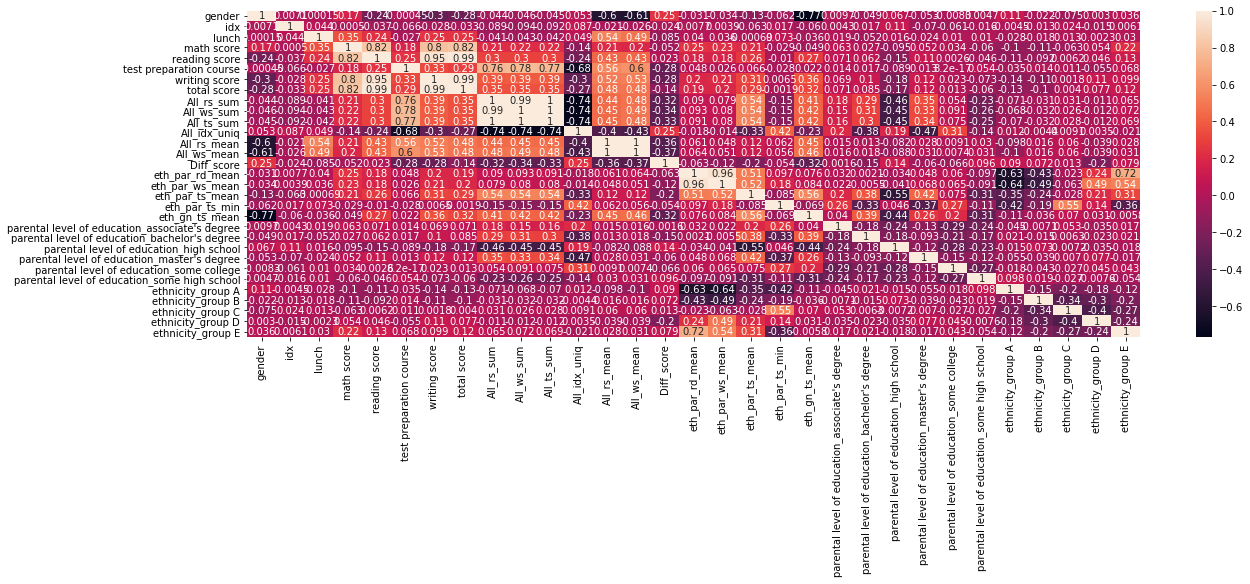

In [923]:
plt.figure(figsize=(20,6))
sns.heatmap(train.corr(),annot=True)

In [924]:
label = train['math score']
train.drop(columns=['idx','math score'],inplace=True)
test.drop(columns=['idx','math score'],inplace=True)

In [932]:
seed = 1000

xtrain,xtest,ytrain,ytest = train_test_split(train,label,test_size=0.15,random_state=seed)  # 0.1



m = LinearRegression()
m.fit(xtrain,ytrain)
trpred = m.predict(xtrain)
tepred = m.predict(xtest)

#pd.Series(m.feature_importances_,index=train.columns).sort_values().plot.barh()

print('Training loss:',np.sqrt(mean_squared_error(ytrain,trpred)),'\t\t','Validation loss:',np.sqrt(mean_squared_error(ytest,tepred)))

Training loss: 5.1883324645334365 		 Validation loss: 5.177189010790815


In [926]:
predicted = m.predict(test)

In [458]:
def model(m,train,label,test,rnd_st,col):
    df=pd.DataFrame(np.zeros(shape=(test.shape[0],col)))
    trpred=[]
    tepred=[]
    splits = KFold(n_splits=col,random_state=rnd_st, shuffle=True)
    for i,(tr_index,te_index) in (enumerate(splits.split(train,label))):
        xtrain,xtest = train.loc[tr_index,:], train.loc[te_index,:]
        ytrain,ytest = label.loc[tr_index], label.loc[te_index]
    
        m.fit(xtrain,ytrain)
        ytrpred=m.predict(xtrain)
        ypred = m.predict(xtest)
        #print(ytrpred.shape,ypred.shape)
        trpred.append(np.sqrt(mean_squared_error(ytrain,ytrpred)))
        tepred.append(np.sqrt(mean_squared_error(ytest,ypred)))
        df.iloc[:,i] = m.predict(test)
   # pd.Series(m.feature_importances_,index=train.columns).sort_values().plot.barh()
       # print('Training loss : {}    ,   Testing loss : {}'.format(np.sqrt(mean_squared_error(ytrain,ytrpred)),np.sqrt(mean_squared_error(ytest,ypred)))) 
    print(np.mean(trpred),np.mean(tepred))
    return(df)

In [460]:
prd = model(LinearRegression(),train,label,test,1000,2)

5.070077555367623 5.435528994070539


In [1486]:
prd.head()

,0,1
0,63.210938,64.757259
1,71.250000,71.967381
2,85.734375,84.631219
3,53.625000,52.078106
4,72.062500,71.984451


In [1487]:
final = np.mean(prd,axis=1)

In [927]:
sample['math score'] = predicted

In [928]:
sample.head()

,idx,math score
0,0,64.206787
1,1,70.888916
2,2,85.185791
3,3,53.018066
4,4,72.477783


In [1431]:
sample['math score'] = sample['math score'].astype('int')

In [929]:
sample['math score'] = sample['math score'].apply(lambda x: x if x<=100 else 100)

In [930]:
sample.to_csv('answers7.csv',index=False)